In [1]:

from __future__ import print_function   

import os
import numpy as np
import pylab as py


from local_minima import *
from critical_points_lines import *

In [13]:
Navg_x = 12  # number of points taken when calculating local average (one sided along x direction)
Navg_y = 12  # number of points taken when calculating local average (one sided along y direction)
Npoints_th = .6
th_thin = 0.1  # Thereshold for thinning critical points (i.e. two points with Euclidean dist < th_thin are counted only once)

Nx = 400                         # No. of grid points along x direction
Ny = 300                         # No. of grid points along y direction
x = np.linspace(-2,2,Nx)         # x variables in 1D
y = np.linspace(-2,2,Ny)         # y variable in 1D
    
X,Y = np.meshgrid(x,y)          # 2D meshgrid
Fx = 6*X*Y
Fy = 3*X**2 - 3*Y**2

# Fx = np.sin(X+Y) * np.exp(-0.5*X**2 - 0.3*Y**2)
# Fy = np.cos(X-Y) * np.exp(-0.5*X**2 - 0.3*Y**2)

F_true = X**3 - 3 * X * Y**2
F =  np.sqrt(Fx**2 + Fy**2)             # Vector field magnitude 

Nx = len(x)
Ny = len(y)


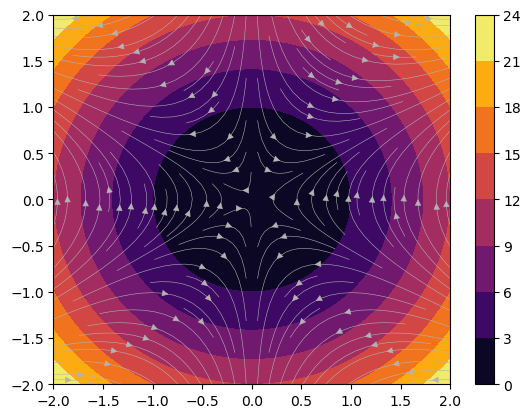

In [14]:
py.figure()

py.contourf(x,y,F,cmap = 'inferno')
py.colorbar(cmap = 'inferno')

py.streamplot(x,y,Fx,Fy,color = [.7, .7 , .7],density = 1.2, linewidth = 0.4)


m = 0, ratio = 1.000, flag = 0 



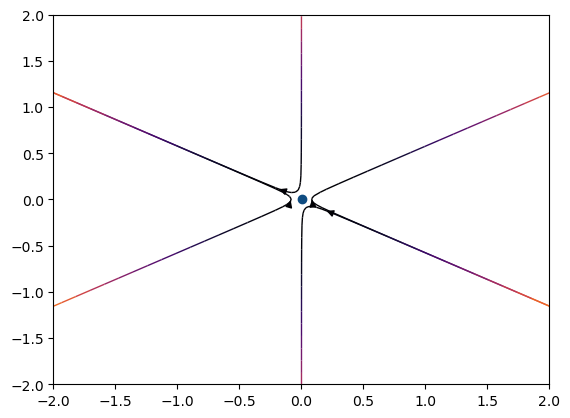

In [16]:
ind_1 = adj_local_minima(x,y,F)                   # Find indices of the local minimas. Correct for corner points
c_type = critical_point_type(x, y, Fx, Fy, ind_1)
ind_2 = thin_local_minima(x,y,ind_1,th_thin)    # Ignore points that are close to each other (select only one)
avF = avgF_at_local_minima(F,ind_2,Navg_x,Navg_y)            # Calculate local averages
# ind_sort = np.flip(np.argsort(avF))                         # sort from maximum average value to minimum average value
ind_sort = np.argsort(avF)                                   # sort from minimum average value to maximum average value
Npoints = Npoint_estimate(avF[ind_sort], Npoints_th,1)       # Estimate the number of critical points
ind_3 = adj_with_rank(ind_2, ind_sort, Npoints)              # Clip to the estimated number of critical points
ind_adj = ind_3                       # Local average raknin algorithm needs more work. It is skipped for now

if Npoints > 0:
    stream_lines(x,y,Fx,Fy,ind_adj)


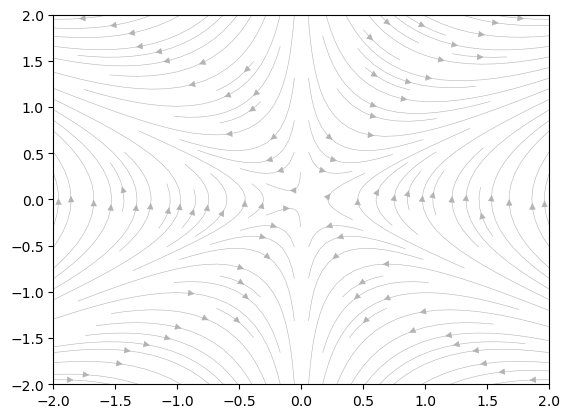

In [17]:
py.streamplot(x,y,Fx,Fy,color = [.7, .7 , .7],density = 1.2, linewidth = 0.4)


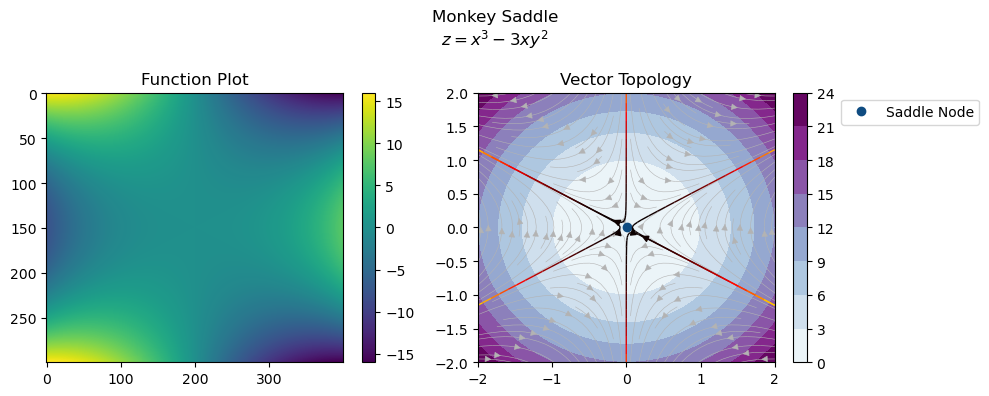

In [37]:
py.figure(figsize=(10,4))
py.subplot(121)
py.imshow(F_true, aspect='auto')
# py.contourf(x, y, F_true)
py.colorbar()
py.title("Function Plot")

py.subplot(122)
py.contourf(x,y,F,cmap = 'BuPu')
py.colorbar()
py.streamplot(x,y,Fx,Fy,color = [.7, .7 , .7],density = 1.2, linewidth = 0.4)

if Npoints > 0:
    stream_lines(x,y,Fx,Fy,ind_adj, cmap='hot')
py.legend(bbox_to_anchor=(1.2, 1.),)
py.title("Vector Topology")

py.suptitle("Monkey Saddle" + '\n' + r"$z = x^3 - 3xy^2$")
py.tight_layout()